In [1]:
from bovespa2csv.BovespaParser import BovespaParser
from bovespa2csv.util import get_df_from_b3_data, ibov
import os
from IPython.display import display, HTML
from tqdm import tqdm
import numpy as np
import pandas as pd

In [2]:
paths = ["data/COTAHIST_A{}.TXT".format(i) for i in range(1995, 2021)]
all_dfs = []

In [3]:
path = "data/COTAHIST_A1994.TXT"

parser = BovespaParser()
parser.read_txt(path)
filter1 =  parser.df[parser.df["moeda de referencia"] ==  'R$  ']
filter2 = filter1[filter1["codigo bdi"] == "02"]
df = get_df_from_b3_data(filter2, None)
all_dfs.append(df)

/home/felsal/Desktop/others/Finance/bovespa2csv/bovespa2csv/util.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["codigo de negociação do papel"] = df["codigo de negociação do papel"].apply(


In [4]:
for path in tqdm(paths):
    assert os.path.exists(path)
    parser = BovespaParser()
    parser.read_txt(path)
    if path == 'data/COTAHIST_A2020.TXT':
        filter_ = parser.df[(parser.df["codigo bdi"] == "02") | (parser.df["codigo bdi"] == "14")]
    else:
        filter_ =  parser.df[parser.df["codigo bdi"] == "02"]
    df = get_df_from_b3_data(filter_, None)
    print(path, df.shape)
    all_dfs.append(df)

  4%|▍         | 1/26 [00:01<00:46,  1.87s/it]

data/COTAHIST_A1995.TXT (54990, 7)


  8%|▊         | 2/26 [00:03<00:45,  1.90s/it]

data/COTAHIST_A1996.TXT (57225, 7)


 12%|█▏        | 3/26 [00:06<00:45,  1.98s/it]

data/COTAHIST_A1997.TXT (56139, 7)


 15%|█▌        | 4/26 [00:08<00:49,  2.25s/it]

data/COTAHIST_A1998.TXT (48851, 7)


 19%|█▉        | 5/26 [00:12<00:56,  2.68s/it]

data/COTAHIST_A1999.TXT (57505, 7)


 23%|██▎       | 6/26 [00:15<00:57,  2.86s/it]

data/COTAHIST_A2000.TXT (58304, 7)


 27%|██▋       | 7/26 [00:19<00:56,  2.99s/it]

data/COTAHIST_A2001.TXT (50714, 7)


 31%|███       | 8/26 [00:22<00:55,  3.10s/it]

data/COTAHIST_A2002.TXT (48619, 7)


 35%|███▍      | 9/26 [00:25<00:53,  3.17s/it]

data/COTAHIST_A2003.TXT (51336, 7)


 38%|███▊      | 10/26 [00:29<00:54,  3.43s/it]

data/COTAHIST_A2004.TXT (54469, 7)


 42%|████▏     | 11/26 [00:33<00:51,  3.40s/it]

data/COTAHIST_A2005.TXT (56233, 7)


 46%|████▌     | 12/26 [00:36<00:48,  3.44s/it]

data/COTAHIST_A2006.TXT (58702, 7)


 50%|█████     | 13/26 [00:43<00:58,  4.49s/it]

data/COTAHIST_A2007.TXT (83214, 7)


 54%|█████▍    | 14/26 [00:50<01:03,  5.32s/it]

data/COTAHIST_A2008.TXT (87533, 7)


 58%|█████▊    | 15/26 [00:57<01:01,  5.55s/it]

data/COTAHIST_A2009.TXT (81747, 7)


 62%|██████▏   | 16/26 [01:05<01:03,  6.36s/it]

data/COTAHIST_A2010.TXT (81715, 7)


 65%|██████▌   | 17/26 [01:12<01:00,  6.67s/it]

data/COTAHIST_A2011.TXT (82194, 7)


 69%|██████▉   | 18/26 [01:20<00:55,  6.90s/it]

data/COTAHIST_A2012.TXT (78614, 7)


 73%|███████▎  | 19/26 [01:27<00:48,  6.91s/it]

data/COTAHIST_A2013.TXT (78960, 7)


 77%|███████▋  | 20/26 [01:33<00:39,  6.63s/it]

data/COTAHIST_A2014.TXT (78255, 7)


 81%|████████  | 21/26 [01:39<00:33,  6.62s/it]

data/COTAHIST_A2015.TXT (77184, 7)


 85%|████████▍ | 22/26 [01:46<00:27,  6.80s/it]

data/COTAHIST_A2016.TXT (78450, 7)


 88%|████████▊ | 23/26 [01:58<00:24,  8.28s/it]

data/COTAHIST_A2017.TXT (81721, 7)


 92%|█████████▏| 24/26 [02:08<00:17,  8.90s/it]

data/COTAHIST_A2018.TXT (88400, 7)


 96%|█████████▌| 25/26 [02:20<00:09,  9.78s/it]

data/COTAHIST_A2019.TXT (90099, 7)


100%|██████████| 26/26 [02:40<00:00,  6.17s/it]

data/COTAHIST_A2020.TXT (129913, 7)


In [5]:
final_df = pd.concat(all_dfs)
print(final_df.shape)

(1883203, 7)


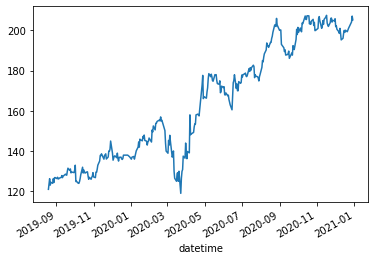

In [6]:
final_df.set_index(["ticker", "datetime"]).xs("SPXI11").open.plot();

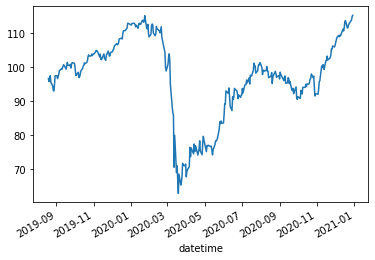

In [7]:
final_df.set_index(["ticker", "datetime"]).xs("BOVA11").open.plot();

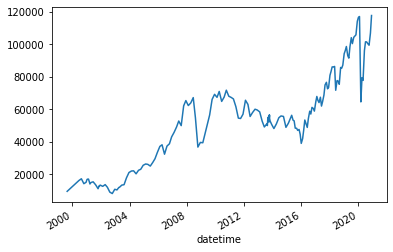

In [8]:
final_df.set_index(["ticker", "datetime"]).xs("IBOV11").open.plot();

In [9]:
final_df.set_index(["ticker", "datetime"]).xs("IBOV11").close.tail()

datetime
2020-08-12    101380.0
2020-09-16    100155.0
2020-10-14     99348.0
2020-11-18    106784.0
2020-12-16    117577.0
Name: close, dtype: float64

In [18]:
final_df.set_index(["ticker", "datetime"]).xs("PETR3").close.tail()

datetime
2020-12-22    27.84
2020-12-23    28.44
2020-12-28    28.65
2020-12-29    28.67
2020-12-30    28.85
Name: close, dtype: float64

In [10]:
final_df.to_csv("filter_data/b3_stocks_1994_2020.csv",index=False)

In [11]:
final_df.shape

(1883203, 7)

In [12]:
final_df.tail(2)

,datetime,ticker,open,close,high,low,volume
129911,2020-12-23,Z1TS34,209.18,209.18,209.18,209.18,10459.00
129912,2020-12-28,Z1TS34,212.14,213.59,213.59,212.14,425.73


In [14]:
import sgs
from datetime import date
first_date = final_df.head().datetime[0].strftime("%d/%m/%Y")
today = date.today().strftime("%d/%m/%Y")

CODE_usd = 1 # dolar
CODE_selic = 11 # Selic

usd2brl = sgs.time_serie(CODE_usd, start=first_date, end=today)
usd2brl.name = "usd_brl"
usd2brl.index.name = "datetime"
usd2brl = usd2brl.to_frame()
usd2brl.to_csv("filter_data/usd2brl.csv")

In [15]:
usd2brl.tail(2)

,usd_brl
datetime,
2020-12-30,5.1967
2020-12-31,5.1967


In [16]:
selic = sgs.time_serie(CODE_selic, start=first_date, end=today)
selic.name = "selic"
selic = selic /100
selic.index.name = "datetime"
selic = selic.to_frame()
selic.to_csv("filter_data/selic.csv")

In [17]:
selic.tail(2)

,selic
datetime,
2020-12-30,0.000075
2020-12-31,0.000075
